<a href="https://colab.research.google.com/github/divyakedia/playstore-data-analysis/blob/main/(Divya_Self)Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# 1. Importing the libraries necessary for project

In [9]:
#The first step is to import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Mounting google drive


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Creating path variable for the datasets

In [11]:
#creating data files path and reading the csv files
playstore_data_path = "/content/drive/MyDrive/(EDA)Capstone Project/Play Store Data (1).csv"
playstore_df = pd.read_csv(playstore_data_path)
users_review_path = "/content/drive/MyDrive/(EDA)Capstone Project/User Reviews.csv"
users_review_df = pd.read_csv(users_review_path)

# 4. Viewing the data of Python database

# 4.1 PlayStore Data

In [12]:
#Viewing the dataframe of playstore data
playstore_df.head(-1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [13]:
playstore_df.shape

(10841, 13)

In [14]:
# Print last 5 no. of rows
playstore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [15]:
# Printing basic information about the DataFrame
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [16]:
# To view available numeric column
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [17]:
# To view all the columns of the available dataframe
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# 4.2 User Review Data

In [18]:
users_review_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [19]:
# To view available numeric column
users_review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [20]:
# Printing basic information about the DataFrame
users_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# 5. Cleaning the data of Playstore Dataframe

By Studying the DataFrame, we see noticed that,


*  The Shape of the DataFrame is (10841, 13).
*    Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'.
*   Column 'Size' have the  strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.
*   Column 'Installs' have strings representing no. of installs with symbols such as ',' and '+'.
*   Column 'Price' have strings representing price with symbol '$'.

Thus, the data has to be cleaned for further process.





In [21]:
# Find the row with insufficiant data:
playstore_df[playstore_df['Type']!='Free'][playstore_df[playstore_df['Type']!='Free']['Price']=='0']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [22]:
#Drop the row from the data frame:
playstore_df.drop(playstore_df[playstore_df['Type']!='Free'][playstore_df[playstore_df['Type']!='Free']['Price']=='0'].index, inplace=True)

In [23]:
#Find value mismatched row:
playstore_df[playstore_df['Genres']=='February 11, 2018']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [24]:
#Find the index of the row which contains the carbage value:
playstore_df[playstore_df['Genres']=='February 11, 2018'].index

Int64Index([10472], dtype='int64')

In [25]:
#Drop the found carbage row from our dataframe:
playstore_df.drop(playstore_df[playstore_df['Genres']=='February 11, 2018'].index, inplace=True)

In [26]:
#making a fuction to clean the strings:
def clean_data(val):

  
  if 'M' in str(val):
    val = str(int(float(val.replace('M',''))*1000000))
  if 'k' in str(val):
    val = str(int(float(val.replace('k',''))*1000))
  if '+' in str(val):
    val = val.replace('+',' ')
  if ',' in str(val):
    val = val.replace(',','')
  if 'NaN' in str(val):
    val = '0'
  if '$' in str(val):
    val = val.replace('$','')
  else:
    pass
  return val

In [27]:
# To Clean the unwanted charactors and to convert the required column values into valid numeric type:

#Change the 'Reviews' column values to valid numeric values:
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'])

#Change the 'Size' column values to valid numeric values:
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playstore_df['Size'] = pd.to_numeric(playstore_df['Size'].map(lambda x: clean_data(x)))

#Change the 'Installs' column values to valid numeric values:
playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'].map(lambda x: clean_data(x)))

#Change the 'Price' column values to valid numeric values:
playstore_df['Price'] = pd.to_numeric (playstore_df['Price'].map(lambda x:clean_data(x)))
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            10839 non-null  int64  
 5   Installs        10839 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.2+ MB


In [28]:
playstore_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5076,50000 Free eBooks & Free AudioBooks,BOOKS_AND_REFERENCE,4.1,52312,11000000,5000000,Free,0.0,Teen,Books & Reference,"May 19, 2018",5.3.4,4.4 and up
9674,Masha and the Bear: Evolution,FAMILY,4.5,2062,42000000,500000,Free,0.0,Everyone,Strategy;Education,"June 14, 2018",1.0.9,4.0 and up
1419,Health and Nutrition Guide,HEALTH_AND_FITNESS,4.3,7895,3300000,500000,Free,0.0,Everyone,Health & Fitness,"July 15, 2018",3.3,4.0 and up
10127,EZ Receipts,FINANCE,4.0,2187,0,100000,Free,0.0,Everyone,Finance,"August 1, 2018",Varies with device,Varies with device
2717,"Kohl's: Scan, Shop, Pay & Save",SHOPPING,4.5,79261,57000000,5000000,Free,0.0,Everyone,Shopping,"August 3, 2018",7.36,4.4 and up
1802,Partymasters - Fun Idle Game,GAME,4.6,541144,63000000,10000000,Free,0.0,Teen,Arcade,"July 12, 2018",1.2.5,5.0 and up
1398,Weight Loss Tracker - RecStyle,HEALTH_AND_FITNESS,4.4,20547,5700000,1000000,Free,0.0,Everyone,Health & Fitness,"November 29, 2017",3.2.7,4.1 and up
957,Telemundo Now,ENTERTAINMENT,3.9,8674,19000000,1000000,Free,0.0,Teen,Entertainment,"May 25, 2018",3.3.1.42,4.4 and up
9737,Hospital ER Emergency Heart Surgery: Doctor Games,FAMILY,3.8,1652,71000000,100000,Free,0.0,Everyone,Simulation,"July 11, 2018",10,4.1 and up
2592,Tango - Live Video Broadcast,SOCIAL,4.3,3806669,0,100000000,Free,0.0,Mature 17+,Social,"August 1, 2018",Varies with device,Varies with device


In [29]:
playstore_df.isna().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

As we can see that in "Rating" there are 1473 null values. Hence we decided to replace them with the median of "Rating".

In [30]:
# Replacing the null values with the median of Rating:
def replace_nullval(nullval):
    """
    replace the rows with null values 
    with median values
    """
    return nullval.fillna(nullval.median())

playstore_df['Rating'] = playstore_df['Rating'].transform(replace_nullval)
playstore_df['Rating'] = playstore_df['Rating'].astype(float)

In [31]:
playstore_df.isna().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [32]:
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 6. Cleaning the data of User Review Dataframe

In [33]:
#Eliminating the null value rows from the database

no_null_user_reviews_df = users_review_df[users_review_df['Sentiment'].isna()]
no_null_user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26863 entries, 2 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     26863 non-null  object 
 1   Translated_Review       0 non-null      object 
 2   Sentiment               0 non-null      object 
 3   Sentiment_Polarity      0 non-null      float64
 4   Sentiment_Subjectivity  0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 1.2+ MB


In [34]:
no_null_user_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


# 7. Preparation of the Data

In [35]:
# Checking for duplicate apps from the DataFrame:
duplicate_check = playstore_df['App'].duplicated().any()
duplicate_check

True

In [36]:
# Apps and count of each app
playstore_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
U-Report                                             1
U of I Community Credit Union                        1
Waiting For U Launcher Theme                         1
Wi u Emulator                                        1
iHoroscope - 2018 Daily Horoscope & Astrology        1
Name: App, Length: 9658, dtype: int64

In [37]:
# Taking all the last rows of data from each app:
last_rows = playstore_df.groupby('App').tail(1).reset_index()
app_max_review = last_rows.loc[last_rows.groupby(['App'])['Reviews'].idxmax()]

In [38]:
#Getting the  Genres:
top_genres = app_max_review.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
top_genres

,Genres,Count
0,Tools,828
1,Entertainment,561
2,Education,510
3,Business,419
4,Medical,396
...,...,...
113,Health & Fitness;Action & Adventure,1
114,Art & Design;Pretend Play,1
115,Travel & Local;Action & Adventure,1
116,Trivia;Education,1


In [39]:
# Reviewing The apps which are free to use based on reviews:
app_max_review[app_max_review['Price'] == 0]
app_max_review

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7703,8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.3,27,3600000,500,Free,0.00,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
7351,8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000,1000000,Free,0.00,Everyone,Social,"August 2, 2018",5.03,4.1 and up
267,324,- Free Comics - Comic Apps,COMICS,3.5,115,9100000,10000,Free,0.00,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3360,4541,.R,TOOLS,4.5,259,203000,10000,Free,0.00,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
3455,4636,/u/app,COMMUNICATION,4.7,573,53000000,10000,Free,0.00,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153,6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,4.3,414,59000000,100000,Free,0.00,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
3181,4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
1774,2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18000000,1000000,Free,0.00,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
6378,7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3200000,10000,Free,0.00,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [40]:
#Printing the dataframe which contains paid apps install counts:
genres_paidapp_count = playstore_df[playstore_df['Price']!= 0].groupby(['Genres'])[['Installs']].sum().rename(columns={'Installs':'Paid_app_installs'})
genres_paidapp_count

,Paid_app_installs
Genres,
Action,17052250
Action;Action & Adventure,20500
Adventure,1278200
Adventure;Action & Adventure,150000
Adventure;Brain Games,100000
...,...
Strategy;Action & Adventure,100000
Tools,1727441
Travel & Local,183060


In [41]:
#Printing the  dataframe which contains mean Rating
genres_ratings_df = app_max_review.groupby(['Genres'])[['Rating']].mean()
genres_ratings_df

,Rating
Genres,
Action,4.246154
Action;Action & Adventure,4.316667
Adventure,4.182192
Adventure;Action & Adventure,4.300000
Adventure;Brain Games,4.600000
...,...
Trivia;Education,4.300000
Video Players & Editors,4.066871
Video Players & Editors;Music & Video,4.000000


In [42]:
#Preparing dataframe which contains free app install counts
genres_freeapp_install = app_max_review[app_max_review['Price'] == 0].groupby(['Genres'])[['Installs']].sum()


In [44]:
#Mergering all the data previous dataframes
top_genres_install_df = pd.merge(top_genres, genres_freeapp_install, on='Genres')
top_genres_apps_installs_df = pd.merge(top_genres_install_df, genres_paidapp_count, on='Genres')
top_genres_apps_installs_ratings_df = pd.merge(top_genres_apps_installs_df, genres_ratings_df, on='Genres')

#Getting top 50 data frames based on the Genres
top_30_genres_df = top_genres_apps_installs_ratings_df.head(30)
top_30_genres_df

,Genres,Count,Installs,Paid_app_installs,Rating
0,Tools,828,8091044474,1727441,4.073913
1,Entertainment,561,3014472513,242171,4.118182
2,Education,510,262803901,106247,4.292353
3,Business,419,691952090,412775,4.172792
4,Medical,396,38642344,1020033,4.204040
5,Personalization,376,1529235988,5258794,4.325532
6,Productivity,374,5786679314,1412055,4.206150
7,Lifestyle,368,492644429,1179110,4.131793
8,Finance,345,455163132,185602,4.138551
9,Sports,331,1411230683,1243815,4.238369


# Number of Apps available  per Category of Apps (Top 10)

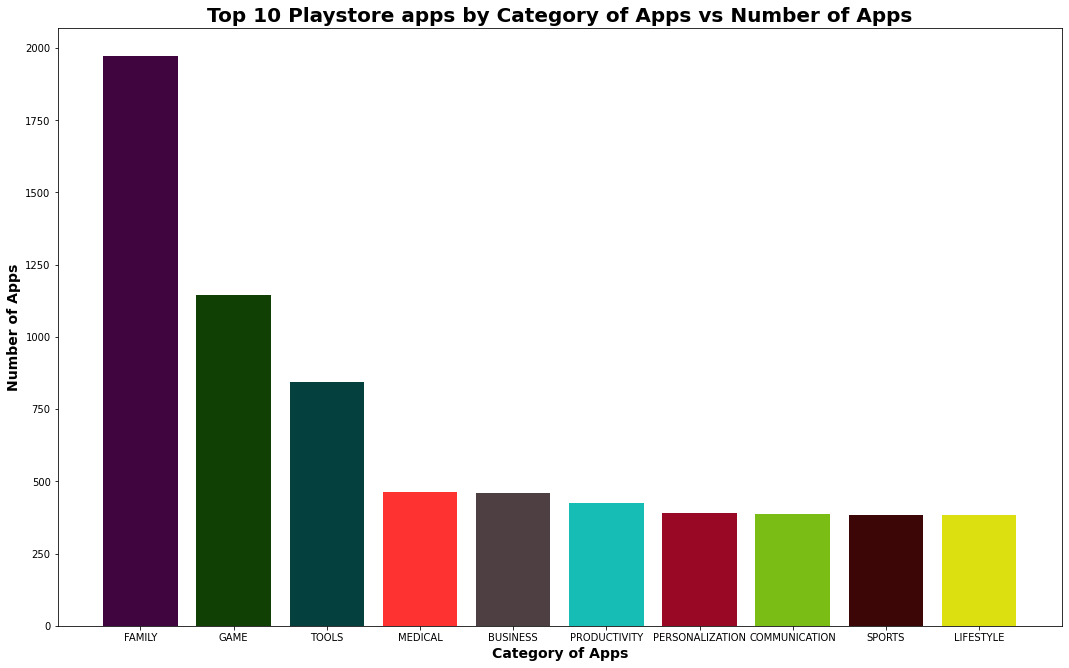

In [88]:
# Making a barplot of Category of apps vs Number of apps available
top10_app_cat = playstore_df.Category.value_counts().head(10)
plt.figure(figsize=(18,11))
sns.barplot(x = top10_app_cat.index , y = top10_app_cat.values)
plt.xlabel("Category of Apps", fontsize=14, fontweight= "bold")
plt.ylabel("Number of Apps", fontsize= 14, fontweight="bold")
plt.title("Top 10 Playstore apps by Category of Apps vs Number of Apps", fontsize = 20 , fontweight = "bold")
plt.bar(x = top10_app_cat.index ,height=top10_app_cat.values ,color = ["#40043f", "#114004", "#04403d","#FF3232","#4d3f42","#15bdb4","#990926","#7abd15","#3C0606","#dde010"])
plt.show()